# Reconhecimento Cães e Gatos

# Carregar e preparar o dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step


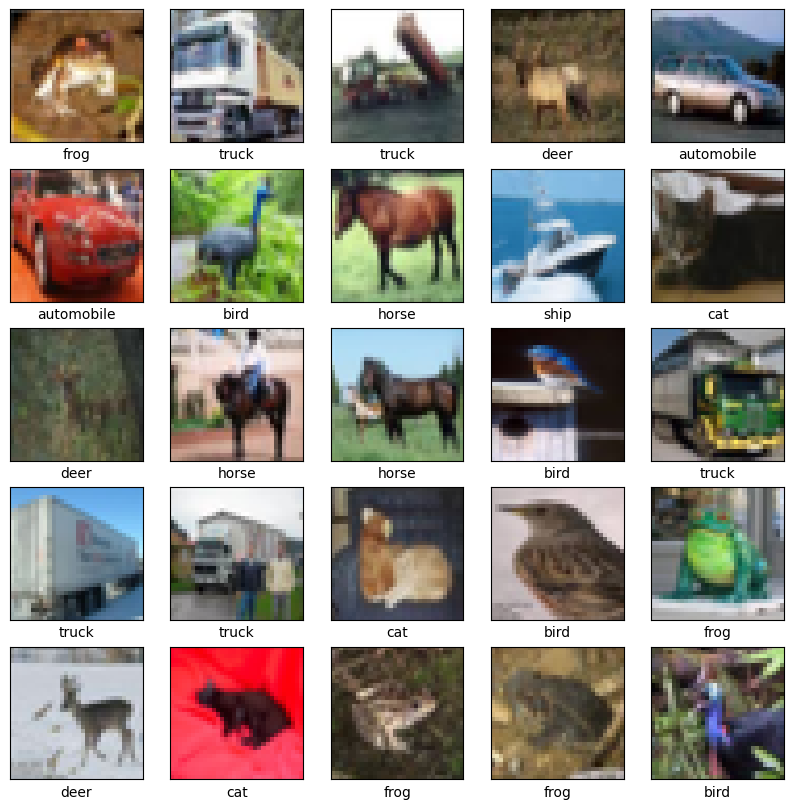

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar os valores dos pixels (0-255) para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertendo os rótulos para one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualizar algumas imagens do dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()


# Criar o modelo

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\joaop\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

# Treinar o modelo

In [3]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.3078 - loss: 1.8459 - val_accuracy: 0.4970 - val_loss: 1.4233
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5151 - loss: 1.3464 - val_accuracy: 0.5999 - val_loss: 1.1338
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5777 - loss: 1.1755 - val_accuracy: 0.6428 - val_loss: 1.0118
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6155 - loss: 1.0784 - val_accuracy: 0.6613 - val_loss: 0.9637
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.6426 - loss: 1.0058 - val_accuracy: 0.6820 - val_loss: 0.9181
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6576 - loss: 0.9608 - val_accuracy: 0.6935 - val_loss: 0.8872
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6788 - loss: 0.9064 - val_accuracy: 0.6846 - val_loss: 0.9054
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6868 - loss: 0.8769 - 

# Avaliar o modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7445 - loss: 0.7454
Test Loss: 0.7397851943969727
Test Accuracy: 0.7483999729156494


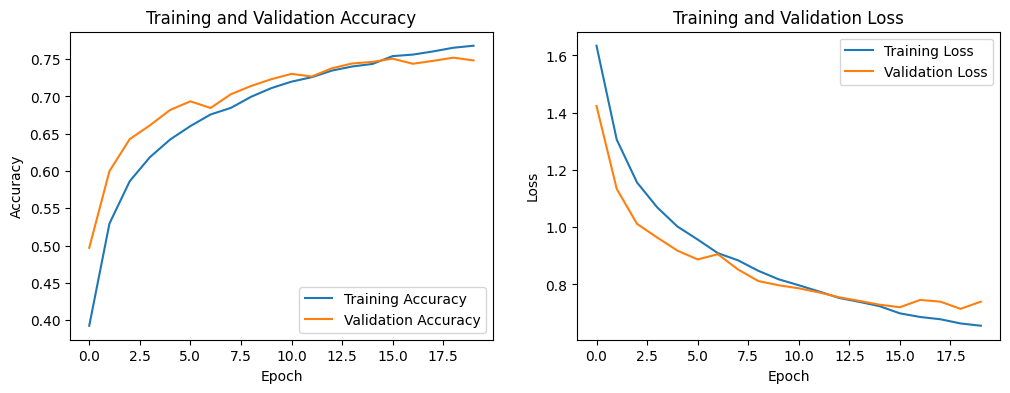

In [4]:
# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plotar as curvas de acurácia e perda
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Salvar e carregar o modelo

In [5]:
# Salvar o modelo
model.save('cifar10_model.h5')

# Carregar o modelo
loaded_model = tf.keras.models.load_model('cifar10_model.h5')


# fazer uma nova predição

In [6]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(32, 32)):
    # Carregar a imagem
    img = image.load_img(img_path, target_size=target_size)
    # Converter a imagem em um array
    img_array = image.img_to_array(img)
    # Adicionar uma dimensão extra para representar o lote
    img_array = np.expand_dims(img_array, axis=0)
    # Normalizar os valores dos pixels (0-255) para o intervalo [0, 1]
    img_array = img_array.astype('float32') / 255.0
    return img_array

# Caminho para a nova imagem
img_path = 'transferir.jfif'
img_array = load_and_preprocess_image(img_path)


# Fazer a predição
prediction = model.predict(img_array)
# Obter a classe predita
predicted_class = np.argmax(prediction, axis=1)[0]

# Classes do CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar a classe predita
print(f'Predicted class: {class_names[predicted_class]}')

# Carregar e mostrar a imagem original
original_image = image.load_img(img_path)
plt.imshow(original_image)
plt.title(f'Predicted class: {class_names[predicted_class]}')
plt.axis('off')
plt.show()

